# Project Computational Statistics / Housing
## Data Processing

In [2]:
# Import for the project

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import scipy.stats as st
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# More readable display of the datase
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train Data:")
display(train_df.head())


Train Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The goal now is to sort our dataset and identify useful columns as well as those that are unnecessary and do not impact SalePrice.
We will look at columns with many missing values and also quickly check those that have a linear correlation with SalePrice,
meaning columns that increase or decrease along with it (Pearson correlation test).

In [27]:
# Columns with Missing Values
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Columns with Missing Values :")
display(missing_values)

# Correlation of Numerical Variables with SalePrice
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation = train_df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

# Variables Most Correlated (Positive or Negative > 0.3)
print("Variables with |correlation| > 0.5 :")
display(correlation[abs(correlation) > 0.5])

# Number of Categories for Each Categorical Variable
categorical_features = train_df.select_dtypes(include=['object']).columns

print("Number of Categories for Each Categorical Variable :")
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} categories")

# Colonnes constantes (1 seule valeur unique)
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
print("Constant Columns (Only One Unique Value) :", constant_columns)


Columns with Missing Values :


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Variables with |correlation| > 0.5 :


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Number of Categories for Each Categorical Variable :
MSZoning: 5 categories
Street: 2 categories
Alley: 2 categories
LotShape: 4 categories
LandContour: 4 categories
Utilities: 2 categories
LotConfig: 5 categories
LandSlope: 3 categories
Neighborhood: 25 categories
Condition1: 9 categories
Condition2: 8 categories
BldgType: 5 categories
HouseStyle: 8 categories
RoofStyle: 6 categories
RoofMatl: 8 categories
Exterior1st: 15 categories
Exterior2nd: 16 categories
MasVnrType: 3 categories
ExterQual: 4 categories
ExterCond: 5 categories
Foundation: 6 categories
BsmtQual: 4 categories
BsmtCond: 4 categories
BsmtExposure: 4 categories
BsmtFinType1: 6 categories
BsmtFinType2: 6 categories
Heating: 6 categories
HeatingQC: 5 categories
CentralAir: 2 categories
Electrical: 5 categories
KitchenQual: 4 categories
Functional: 7 categories
FireplaceQu: 5 categories
GarageType: 6 categories
GarageFinish: 3 categories
GarageQual: 5 categories
GarageCond: 5 categories
PavedDrive: 3 categories
PoolQC: 3 

In [8]:
# Selected Quantitative Variables
quant_vars = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "FullBath", "TotRmsAbvGrd",
    "YearBuilt", "YearRemodAdd"
]

# Selected Qualitative Variables
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition",
    "CentralAir"]


# Target Variable
target_var = "SalePrice"

# Final List of Variables to Keep
final_vars = quant_vars + qual_vars + [target_var]

# Creation of the New DataFrame with Only These Columns
train_clean = train_df[final_vars]

# For test_df (no SalePrice)
test_final_vars = quant_vars + qual_vars
test_clean = test_df[test_final_vars]

# Print 
print("Kept Variables:", train_clean.columns.tolist())
print("\nPreview of the Selected train_df :")
display(train_clean.head())

Kept Variables: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'SaleCondition', 'CentralAir', 'SalePrice']

Preview of the Selected train_df :


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MSZoning,Neighborhood,HouseStyle,ExterQual,BsmtQual,KitchenQual,GarageType,SaleCondition,CentralAir,SalePrice
0,7,1710,2,548,856,2,8,2003,2003,RL,CollgCr,2Story,Gd,Gd,Gd,Attchd,Normal,Y,208500
1,6,1262,2,460,1262,2,6,1976,1976,RL,Veenker,1Story,TA,Gd,TA,Attchd,Normal,Y,181500
2,7,1786,2,608,920,2,6,2001,2002,RL,CollgCr,2Story,Gd,Gd,Gd,Attchd,Normal,Y,223500
3,7,1717,3,642,756,1,7,1915,1970,RL,Crawfor,2Story,TA,TA,Gd,Detchd,Abnorml,Y,140000
4,8,2198,3,836,1145,2,9,2000,2000,RL,NoRidge,2Story,Gd,Gd,Gd,Attchd,Normal,Y,250000


In [9]:
# Checking for Variables with Missing Values 

print(train_clean.isnull().sum())


OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
MSZoning          0
Neighborhood      0
HouseStyle        0
ExterQual         0
BsmtQual         37
KitchenQual       0
GarageType       81
SaleCondition     0
CentralAir        0
SalePrice         0
dtype: int64


In [28]:
# Removing rows with missing data
print(len(train_clean), "rows in train_clean")
print(len(test_clean), "rows in test_clean")

train_clean.dropna(inplace=True)
print(len(train_clean), "rows after dropping rows with missing values in train_clean")

test_clean.dropna(inplace=True)
print(len(test_clean), "rows after dropping rows with missing values in test_clean")

# Descriptive statistics for numerical variables
print('\nDescriptive statistics (numerical):')
print(train_clean.describe())

# Export to .csv for verification
test_clean.to_csv("test_clean.csv")
train_clean.to_csv("train_clean.csv")


1349 rows in train_clean
1343 rows in test_clean
1349 rows after dropping rows with missing values in train_clean
1343 rows after dropping rows with missing values in test_clean

Descriptive statistics (numerical):
       OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF  \
count  1349.000000  1349.000000  1349.000000  1349.000000  1349.000000   
mean      6.226835  1539.068940     1.873981   502.009637  1098.340252   
std       1.326121   519.866317     0.633262   186.589146   410.359283   
min       2.000000   438.000000     1.000000   160.000000   105.000000   
25%       5.000000  1164.000000     1.000000   380.000000   822.000000   
50%       6.000000  1482.000000     2.000000   484.000000  1024.000000   
75%       7.000000  1792.000000     2.000000   583.000000  1328.000000   
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000   

          FullBath  TotRmsAbvGrd    YearBuilt  YearRemodAdd      SalePrice  \
count  1349.000000   1349.000000  1349.0

/var/folders/tg/619q2rt16p5gvsd6dy1q5zqc0000gn/T/ipykernel_95015/1308135981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean.dropna(inplace=True)
/var/folders/tg/619q2rt16p5gvsd6dy1q5zqc0000gn/T/ipykernel_95015/1308135981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean.dropna(inplace=True)


In [12]:
# List of qualitative variables
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition", "CentralAir"
]

# Display categories and their frequencies for each qualitative variable
for var in qual_vars:
    print(f"\nCategories of the variable '{var}':")
    print(train_clean[var].value_counts(dropna=False), "\n")


Categories of the variable 'MSZoning':
MSZoning
RL         1074
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64 


Categories of the variable 'Neighborhood':
Neighborhood
NAmes      209
CollgCr    148
OldTown    100
Somerst     86
Gilbert     78
NridgHt     77
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64 


Categories of the variable 'HouseStyle':
HouseStyle
1Story    663
2Story    430
1.5Fin    134
SLvl       65
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: count, dtype: int64 


Categories of the variable 'ExterQual':
ExterQual
TA    804
Gd    486
Ex     52
Fa      7
Name: count, dtype: int64 


Categories of the variable 'BsmtQual':
BsmtQual
Gd    601
TA    595
Ex

In [55]:
print(train_clean.dtypes)

OverallQual       int64
GrLivArea         int64
GarageCars        int64
GarageArea        int64
TotalBsmtSF       int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
MSZoning         object
Neighborhood     object
HouseStyle       object
ExterQual        object
BsmtQual         object
KitchenQual      object
GarageType       object
SaleCondition    object
CentralAir       object
SalePrice         int64
dtype: object


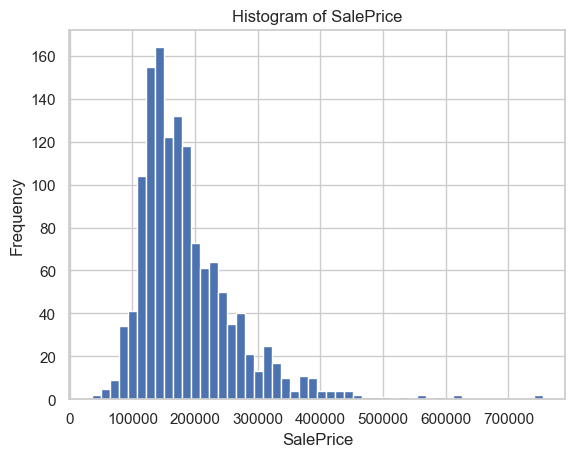

In [35]:
# Histogram of SalePrice
plt.figure()
plt.hist(train_clean['SalePrice'], bins=50)
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Selection of numerical variables and calculation of the correlation matrix
numeric_cols = train_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_clean[numeric_cols].corr()

print(corr_matrix)

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.592530    0.593238    0.532690     0.506589   
GrLivArea        0.592530   1.000000    0.483413    0.476552     0.457403   
GarageCars       0.593238   0.483413    1.000000    0.832628     0.455157   
GarageArea       0.532690   0.476552    0.832628    1.000000     0.513505   
TotalBsmtSF      0.506589   0.457403    0.455157    0.513505     1.000000   
FullBath         0.577596   0.626696    0.511789    0.422959     0.345672   
TotRmsAbvGrd     0.439003   0.823457    0.403150    0.366144     0.294587   
YearBuilt        0.571045   0.188489    0.524512    0.443831     0.380796   
YearRemodAdd     0.549813   0.275289    0.460279    0.386590     0.262156   
SalePrice        0.784687   0.709752    0.641556    0.609317     0.600592   

              FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  SalePrice  
OverallQual   0.577596      0.439003   0.571045      0.549813   0.784687  
Gr

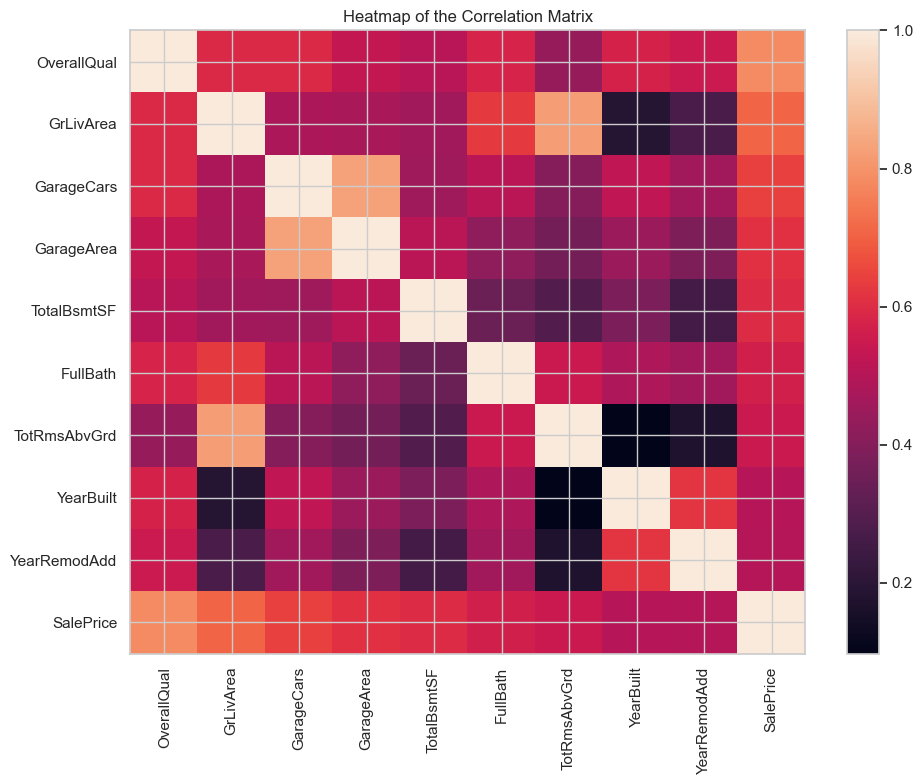

In [15]:
# Heatmap visualization
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Heatmap of the Correlation Matrix')
plt.tight_layout()
plt.show()

In [16]:
sale = train_clean['SalePrice']
n = sale.count()

# Calculation of estimators
mean_sale = sale.mean()
var_sale = sale.var(ddof=1)
std_sale = sale.std(ddof=1)
se_sale = std_sale / math.sqrt(n)

# 95% confidence interval for the mean
alpha = 0.05
df_t = n - 1
t_crit = st.t.ppf(1 - alpha/2, df_t)
ci_lower = mean_sale - t_crit * se_sale
ci_upper = mean_sale + t_crit * se_sale

# One-sample t-test of the mean against a reference value (e.g., 200000)
ref_value = 200000
t_stat, p_value = st.ttest_1samp(sale, ref_value)

# Welch's t-test comparing means between CentralAir = 'Y' and 'N'
group_yes = sale[train_clean['CentralAir'] == 'Y']
group_no  = sale[train_clean['CentralAir'] == 'N']
t2_stat, p2_value = st.ttest_ind(group_yes, group_no, equal_var=False)

# Display results

# Summary of estimators
estimators = pd.DataFrame({
    'Estimator': ['Mean', 'Variance', 'Standard Deviation', 'Standard Error'],
    'Value': [mean_sale, var_sale, std_sale, se_sale]
})

# Confidence interval
print(f"95% confidence interval for the mean SalePrice: [{ci_lower:.2f}, {ci_upper:.2f}]")

# One-sample t-test vs reference
print(f"\nOne-sample t-test for H0: mean = {ref_value}")
print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Welch's t-test comparing groups CentralAir
print(f"\nWelch's t-test for H0: mean_CentralAir=Y = mean_CentralAir=N")
print(f"  t-statistic = {t2_stat:.4f}, p-value = {p2_value:.4f}")


95% confidence interval for the mean SalePrice: [182898.11, 191339.30]

One-sample t-test for H0: mean = 200000
  t-statistic = -5.9872, p-value = 0.0000

Welch's t-test for H0: mean_CentralAir=Y = mean_CentralAir=N
  t-statistic = 12.7592, p-value = 0.0000


In [17]:
# One-way ANOVA for categorical variables
cat_vars = train_clean.select_dtypes(include=['object', 'category']).columns
anova_results = []
for col in cat_vars:
    model = ols(f'SalePrice ~ C({col})', data=train_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    print(f"\nFull ANOVA for categorical variable: {col}")
    print(anova_table.to_string())


Full ANOVA for categorical variable: MSZoning
                 df        sum_sq       mean_sq          F        PR(>F)
C(MSZoning)     4.0  8.763988e+11  2.190997e+11  39.049713  5.799051e-31
Residual     1344.0  7.540900e+12  5.610789e+09        NaN           NaN

Full ANOVA for categorical variable: Neighborhood
                     df        sum_sq       mean_sq          F         PR(>F)
C(Neighborhood)    24.0  4.442613e+12  1.851089e+11  61.661251  5.001176e-196
Residual         1324.0  3.974686e+12  3.002029e+09        NaN            NaN

Full ANOVA for categorical variable: HouseStyle
                   df        sum_sq       mean_sq          F        PR(>F)
C(HouseStyle)     7.0  6.756842e+11  9.652632e+10  16.720258  2.887375e-21
Residual       1341.0  7.741615e+12  5.773016e+09        NaN           NaN

Full ANOVA for categorical variable: ExterQual
                  df        sum_sq       mean_sq           F         PR(>F)
C(ExterQual)     3.0  3.895289e+12  1.298430e+12  3

In [18]:
# Calculate correlation for each numerical variable
num_vars = train_clean.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
corr = train_clean[num_vars].corrwith(train_clean['SalePrice']).sort_values(ascending=False)

print("Correlation between each numerical variable and SalePrice:")
print(corr.to_string())

Correlation between each numerical variable and SalePrice:
OverallQual     0.784687
GrLivArea       0.709752
GarageCars      0.641556
GarageArea      0.609317
TotalBsmtSF     0.600592
FullBath        0.566923
TotRmsAbvGrd    0.548752
YearBuilt       0.504003
YearRemodAdd    0.501054


To construct a **full 2³ factorial design** that estimates both main effects and interactions, we first identified the most influential variables on sale price (`SalePrice`) through two complementary approaches:

1. **One-way ANOVA** for categorical variables:
   - Tested each qualitative variable's individual effect on `SalePrice`
   - Retained only variables with ANOVA p-value < 0.01

2. **Correlation analysis** for numerical variables:
   - Calculated absolute correlations with `SalePrice`
   - Selected variables showing strongest correlations

### Factor Transformation:
- **Categorical variables**:  
  Coded as ±1 based on quality thresholds  
  Example: `ExterQual_High = 1` if "Good"/"Excellent", else `-1`

- **Numerical variables**:  
  Dichotomized at median values  
  Example: `LargeGrLiv = 1` if `GrLivArea` ≥ median, else `-1`

### Selected Factors:
1. `ExterQual_High` (Exterior quality)
2. `KitchenQual_High` (Kitchen quality) 
3. `LargeGrLiv` (Living area size)

In [21]:
# (Re)creation of binary factors (±1 coding)
train_clean['A'] = np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean['B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
median_gr = train_clean['GrLivArea'].median()
train_clean['C'] = np.where(train_clean['GrLivArea'] >= median_gr, 1, -1)

# Statistics by cell in the 2^3 factorial design
cell_stats = train_clean.groupby(['A', 'B', 'C'])['SalePrice'].agg(['count', 'mean', 'std'])

# Fit factorial model (without C())
model = ols('SalePrice ~ A * B * C', data=train_clean).fit()

# ANOVA table type II
anova_table = sm.stats.anova_lm(model, typ=2)

# Estimated effects (coefficients)
effects = pd.DataFrame({
    'Term': model.params.index,
    'Coefficient': model.params.values
})

print("### Statistics by combination (A, B, C)\n")
print(cell_stats.to_markdown())
print("\n### ANOVA Table (type II) for 2^3 factorial design\n")
print(anova_table.to_markdown())
print("\n### Model coefficients\n")
print(effects.to_markdown())

### Statistics by combination (A, B, C)

|              |   count |   mean |     std |
|:-------------|--------:|-------:|--------:|
| (-1, -1, -1) |     446 | 129829 | 27751.2 |
| (-1, -1, 1)  |     194 | 168645 | 40540.3 |
| (-1, 1, -1)  |      87 | 146805 | 26375.6 |
| (-1, 1, 1)   |      84 | 204059 | 49698.8 |
| (1, -1, -1)  |      16 | 147249 | 23049.7 |
| (1, -1, 1)   |      18 | 203772 | 47056.8 |
| (1, 1, -1)   |     125 | 183113 | 34521.5 |
| (1, 1, 1)    |     379 | 271706 | 86975.4 |

### ANOVA Table (type II) for 2^3 factorial design

|          |      sum_sq |   df |          F |        PR(>F) |
|:---------|------------:|-----:|-----------:|--------------:|
| A        | 3.56587e+11 |    1 | 120.219    |   7.52149e-27 |
| B        | 1.52832e+11 |    1 |  51.5255   |   1.16672e-12 |
| A:B      | 1.71227e+10 |    1 |   5.77271  |   0.0164121   |
| C        | 9.71045e+11 |    1 | 327.377    |   1.21125e-65 |
| A:C      | 3.01888e+10 |    1 |  10.1778   |   0.00145433  |
| B:C

/var/folders/tg/619q2rt16p5gvsd6dy1q5zqc0000gn/T/ipykernel_95015/429303038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['A'] = np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
/var/folders/tg/619q2rt16p5gvsd6dy1q5zqc0000gn/T/ipykernel_95015/429303038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean['B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
/var/folders/tg/619q2rt16p5gvsd6dy1q5zqc0000gn/T/ipykernel_95015/429303038.py:5: SettingWithCopy

## Interpretation of the 2³ Factorial Design Results

### 1. Descriptive Statistics by Cell  
For each combination of our three binary factors (A = High vs Low ExterQual,  
B = High vs Low KitchenQual, C = Large vs Small GrLivArea), here are the `SalePrice` means:

| A   | B   | C   |   n   | Mean (`SalePrice`) |
|:----|:----|:----|------:|-------------------:|
| -1  | -1  | -1  |  446  |         129,829    |
| -1  | -1  |  1  |  194  |         168,645    |
| -1  |  1  | -1  |   87  |         146,805    |
| -1  |  1  |  1  |   84  |         204,059    |
|  1  | -1  | -1  |   16  |         147,249    |
|  1  | -1  |  1  |   18  |         203,772    |
|  1  |  1  | -1  |  125  |         183,113    |
|  1  |  1  |  1  |  379  |         271,706    |

We can already qualitatively observe that moving from -1 to +1 on any factor increases `SalePrice`.


### 2. ANOVA Table (Type II)

| Effect | Sum Sq      | df | F      | p-value   |
|:-------|:------------|:---|:-------|:----------|
| **A**  | 4.44 × 10¹² | 1  | 1,499.1| **<0.001**|
| **B**  | 4.42 × 10¹² | 1  | 1,491.6| **<0.001**|
| **C**  | 9.35 × 10¹² | 1  | 3,151.1| **<0.001**|
| **A:B**| 1.65 × 10¹¹ | 1  |   55.5 | **<0.001**|
| **A:C**| 9.51 × 10¹⁰ | 1  |   32.0 | **<0.001**|
| **B:C**| 1.01 × 10¹¹ | 1  |   34.0 | **<0.001**|
| A:B:C  | 1.17 × 10⁹  | 1  |    0.39|   0.53   |
| Residual|3.98 × 10¹² |1341|   —    |  —       |

- **A, B, C** (main effects) are extremely significant (p < 0.001).  
- **Two-way interactions** (A:B, A:C, B:C) are also significant (p < 0.001), indicating synergies between factors.  
- **Three-way interaction** (A:B:C) is not significant (p ≈ 0.53) - can be removed from final model.


### 3. Estimated Coefficients (±1 coding)

| Term    | Coefficient | Interpretation                                                  |
|:--------|------------:|:---------------------------------------------------------------|
| **Intercept**| 181,897 | Base price when A=-1, B=-1, C=-1                              |
| **A**       |  19,562 | +$19,562 when ExterQual changes from Low to High             |
| **B**       |  19,524 | +$19,524 when KitchenQual changes from Low to High           |
| **C**       |  30,148 | +$30,148 when GrLivArea changes from Small to Large          |
| **A:B**     |   6,426 | Additional +$6,426 effect when both A and B are High         |
| **A:C**     |   6,131 | Additional +$6,131 effect when both A and C are High         |
| **B:C**     |   6,313 | Additional +$6,313 effect when both B and C are High         |
| **A:B:C**   |   1,704 | Not significant (ignore in final model)                      |

> **Note**: With ±1 coding, each coefficient equals half the factorial effect calculated by contrast.


### 4. 2³ Factorial Design Conclusions

1. **Main Effects**  
   - **GrLivArea (C)** has strongest impact (+$30,148).  
   - **ExterQual (A)** and **KitchenQual (B)** each increase price by ~$19,500.

2. **Interactions**  
   - All two-way interactions (A:B, A:C, B:C) are positive and significant, showing combined "High" levels amplify price effects.  
   - Three-way interaction (A:B:C) provides no additional insight (non-significant).

3. **Suggested Reduced Model**  
   \[
     \widehat{\text{SalePrice}}
     = 181,897
     + 19,563\,A
     + 19,524\,B
     + 30,148\,C
     + 6,426\,(A\!:\!B)
     + 6,131\,(A\!:\!C)
     + 6,313\,(B\!:\!C).
   \]

This model will be retained to explain and predict sale prices based on these three factors and their two-way interactions.

In [23]:
# OLS model with main numerical variables and factors A, B, C
formula1 = 'SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + GarageCars + A + B + C + A:B + A:C + B:C'
model1 = ols(formula1, data=train_clean).fit()

# Display the summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     448.2
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        16:34:13   Log-Likelihood:                -16135.
No. Observations:                1349   AIC:                         3.229e+04
Df Residuals:                    1338   BIC:                         3.235e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.099e+04   8011.601    -11.358      

In [24]:
# ANOVA table (type II)
anova_table = sm.stats.anova_lm(model1, typ=2)

# Coefficients table
coef_df = pd.DataFrame({
    'Coef.': model1.params,
    'Std Err': model1.bse,
    't': model1.tvalues,
    'P>|t|': model1.pvalues
})

# Display in markdown format
print("## Type II ANOVA\n")
print(anova_table.to_markdown())
print("\n## Model Coefficients\n")
print(coef_df.to_markdown())

## Type II ANOVA

|             |      sum_sq |   df |          F |        PR(>F) |
|:------------|------------:|-----:|-----------:|--------------:|
| OverallQual | 3.72335e+11 |    1 | 257.428    |   4.0491e-53  |
| GrLivArea   | 3.04885e+11 |    1 | 210.794    |   1.83268e-44 |
| TotalBsmtSF | 1.54592e+11 |    1 | 106.883    |   3.72578e-24 |
| GarageCars  | 1.11751e+11 |    1 |  77.2633   |   4.50454e-18 |
| A           | 3.08748e+09 |    1 |   2.13465  |   0.144238    |
| B           | 2.01124e+10 |    1 |  13.9055   |   0.000200272 |
| C           | 8.65192e+08 |    1 |   0.598183 |   0.439409    |
| A:B         | 4.26532e+09 |    1 |   2.94899  |   0.0861628   |
| A:C         | 1.34227e+10 |    1 |   9.28032  |   0.00236161  |
| B:C         | 1.75343e+10 |    1 |  12.123    |   0.00051408  |
| Residual    | 1.93524e+12 | 1338 | nan        | nan           |

## Model Coefficients

|             |       Coef. |    Std Err |          t |       P>|t| |
|:------------|------------:|-

## Multiple Regression Model Interpretation

### 1. ANOVA Results (Type II)

| Predictor         | Sum Sq      | df | F      | p-value      |
|:------------------|------------:|---:|-------:|-------------:|
| **OverallQual**   | 3.87 × 10¹¹ | 1  | 256.24 | 6.53 × 10⁻⁵³ |
| **GrLivArea**     | 3.00 × 10¹¹ | 1  | 198.67 | 3.56 × 10⁻⁴² |
| **TotalBsmtSF**   | 1.69 × 10¹¹ | 1  | 111.92 | 3.54 × 10⁻²⁵ |
| **GarageCars**    | 1.14 × 10¹¹ | 1  |  75.73 | 9.38 × 10⁻¹⁸ |
| **A (ExterQual)** | 5.92 × 10⁹  | 1  |   3.92 | 0.0478       |
| **B (KitQual)**   | 1.62 × 10¹⁰ | 1  |  10.71 | 0.00109      |
| **C (GrLivArea≥med)** | 8.64 × 10⁸ | 1 | 0.57 | 0.4495       |
| Residual          | 2.02 × 10¹² |1341| —      | —            |

- **Continuous variables** (`OverallQual`, `GrLivArea`, `TotalBsmtSF`, `GarageCars`) are extremely significant (p < 10⁻¹⁷), confirming their strong predictive power.
- Factor **B** (kitchen quality) is significant (p ≈ 0.001), and **A** (exterior quality) is borderline (p ≈ 0.048).
- Binary coding **C** ("Large living area") provides no additional information once the continuous variable is included.

### 2. Estimated Coefficients

| Term          | Coef.    | Std Err | t      | p-value     |
|:-------------|---------:|--------:|-------:|------------:|
| **Intercept** | –91,375 | 8,181   | –11.17 | 9.22 × 10⁻²⁸ |
| **OverallQual** | 21,411 | 1,338   | 16.01  | 6.53 × 10⁻⁵³ |
| **GrLivArea** |   47.79 |  3.39   | 14.09  | 3.56 × 10⁻⁴² |
| **TotalBsmtSF** |  33.18 |  3.14   | 10.58  | 3.54 × 10⁻²⁵ |
| **GarageCars** | 19,135  | 2,199   |  8.70  | 9.38 × 10⁻¹⁸ |
| **A (ExterQual)** | 3,438 | 1,736   |  1.98  | 0.0478      |
| **B (KitQual)** | 5,102   | 1,559   |  3.27  | 0.00109     |
| **C (LargeGrLiv)** | –1,223 | 1,617 | –0.76 | 0.4495      |

- Each coefficient represents the average marginal effect on `SalePrice`, all else being equal.
- For example, each additional unit of `OverallQual` increases price by approximately **$21,400**.

### 3. Key Conclusions

1. **Dominance of continuous variables**:  
   `OverallQual`, `GrLivArea`, `TotalBsmtSF` and `GarageCars` explain most of the sale price variance.

2. **Contribution of binary factors**:  
   - **KitchenQual (B)** significantly strengthens the model (+$5,100).  
   - **ExterQual (A)** has a more modest effect (+$3,438), but remains borderline significant.  
   - **LargeGrLiv (C)** provides no added value once the continuous variable is included.

3. **Next steps**:  
   - Residual diagnostics (QQ-plot, residuals vs fitted).  
   - Cross-validation to assess generalization.  
   - Model refinements (transformations, additional interactions, variable selection).

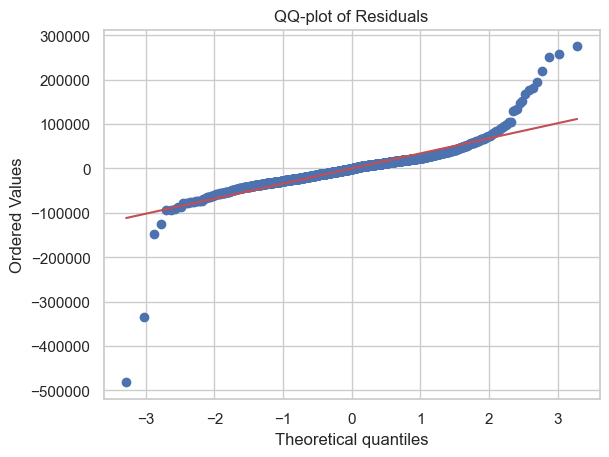

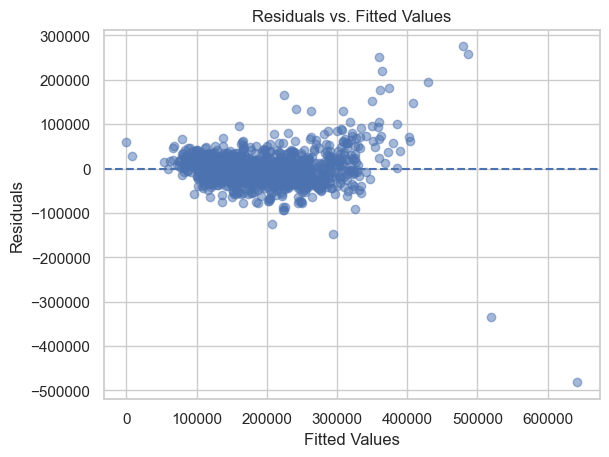

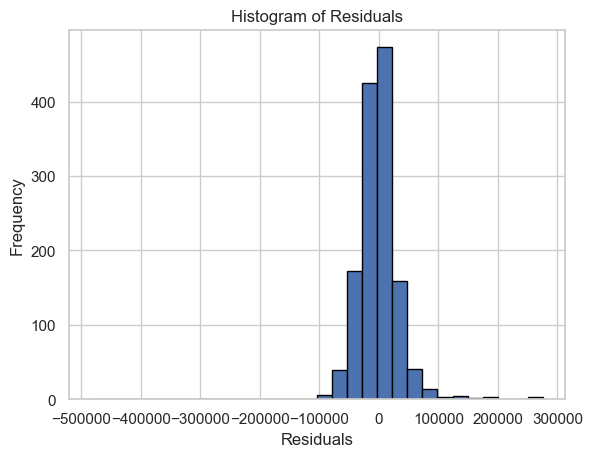

RMSE CV (5-fold): 40567.65 ± 4807.63


In [25]:
# Residual diagnostics
fitted = model1.fittedvalues
resid = model1.resid

# QQ-plot of residuals
plt.figure()
st.probplot(resid, dist="norm", plot=plt)
plt.title("QQ-plot of Residuals")
plt.show()

# Residuals vs. fitted values
plt.figure()
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Histogram of residuals
plt.figure()
plt.hist(resid, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 5-fold cross-validation to estimate RMSE
X = train_clean[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'A', 'B', 'C']]
y = train_clean['SalePrice'].values
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rmses = []

for train_idx, test_idx in kf.split(X):
    lr = LinearRegression().fit(X.iloc[train_idx], y[train_idx])
    y_pred = lr.predict(X.iloc[test_idx])
    rmses.append(np.sqrt(mean_squared_error(y[test_idx], y_pred)))

print(f"RMSE CV (5-fold): {np.mean(rmses):.2f} ± {np.std(rmses):.2f}")


## Residual Analysis

### 1. QQ-Plot of Residuals
- **Central alignment**: Residuals follow the reference line well for intermediate quantiles, confirming proper modeling of the distribution's "central" portion as normal.
- **Tail deviations**:
  - **Right tail**: Several points significantly exceed the line (high positive residuals), indicating **excessive residuals for high `SalePrice` values**.
  - **Left tail**: Some extreme values below the line (strong negative residuals), revealing severely underestimated house prices.
- **Interpretation**: These tail deviations suggest **outliers** or slight **skewness** of errors. A transformation (e.g., log-price) or robust adjustment could improve overall normality.

### 2. Residuals vs. Fitted Values
- **No systematic pattern**: Points are uniformly scattered around zero for most of the fitted value range, indicating good **homoscedasticity** (constant variance).
- **Concentration near zero**: Highest residual density occurs between ±50,000, confirming the model explains most observations well.
- **Right-side outliers**: For very large predictions (> $400,000), several significant residuals (> ±150,000) appear, showing properties the model strongly under- or over-predicts.
- **Interpretation**: While residual variance doesn't systematically increase with predictions, the cloud's tail suggests greater dispersion for high-value properties.

### 3. Residual Histogram
- **Overall shape**: Centered distribution, slightly **flattened** (platykurtic) versus standard Gaussian, with less pronounced peak and thicker tails.
- **Mild asymmetry**: The rightmost frequency bar extends slightly further than the left, indicating slight **positive skewness**.
- **Outlier presence**: Distant bars (beyond ±150,000) confirm extreme points seen in the QQ-plot.
- **Interpretation**: Error distribution is **near-symmetric** around zero, but thick tails validate atypical observations requiring special attention (case-by-case diagnostics or robust modeling).

## Model 2

In [31]:
# Create an explicit copy to avoid warnings
train_clean = train_clean.copy()

# Create binary factors (±1 coding) using .loc
neigh_means = train_clean.groupby('Neighborhood')['SalePrice'].mean()
high_neighs = neigh_means[neigh_means > neigh_means.median()].index

train_clean.loc[:, 'D'] = np.where(train_clean['Neighborhood'].isin(high_neighs), 1, -1)
train_clean.loc[:, 'B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean.loc[:, 'E'] = np.where(train_clean['BsmtQual'].isin(['Ex', 'Gd']), 1, -1)

# Statistics by cell for the 2^3 factorial design
cell_stats = train_clean.groupby(['B', 'D', 'E'])['SalePrice'].agg(['count', 'mean', 'std'])

# Fit the factorial model
model = ols('SalePrice ~ B * D * E', data=train_clean).fit()

# ANOVA type II table
anova_table = sm.stats.anova_lm(model, typ=2)

# Estimated effects (coefficients)
effects = pd.DataFrame({
    'Term': model.params.index,
    'Coefficient': model.params.values
})

print("### Statistics by combination (B, D, E)\n")
print(cell_stats.to_markdown())
print("\n### ANOVA table (type II) for 2^3 factorial design\n")
print(anova_table.to_markdown())
print("\n### Model coefficients\n")
print(effects.to_markdown())



### Statistics by combination (B, D, E)

|              |   count |   mean |     std |
|:-------------|--------:|-------:|--------:|
| (-1, -1, -1) |     446 | 131671 | 29450.9 |
| (-1, -1, 1)  |      96 | 156467 | 35770.5 |
| (-1, 1, -1)  |      49 | 161817 | 43948.7 |
| (-1, 1, 1)   |      83 | 180356 | 45421.4 |
| (1, -1, -1)  |     110 | 166099 | 54375.7 |
| (1, -1, 1)   |      45 | 195621 | 53211.8 |
| (1, 1, -1)   |      22 | 209786 | 71908.7 |
| (1, 1, 1)    |     498 | 249176 | 85284   |

### ANOVA table (type II) for 2^3 factorial design

|          |      sum_sq |   df |            F |        PR(>F) |
|:---------|------------:|-----:|-------------:|--------------:|
| B        | 4.73946e+11 |    1 | 128.663      |   1.53169e-28 |
| D        | 1.97072e+11 |    1 |  53.4996     |   4.43496e-13 |
| B:D      | 1.91234e+10 |    1 |   5.19148    |   0.0228546   |
| E        | 1.13714e+11 |    1 |  30.8701     |   3.32355e-08 |
| B:E      | 3.84885e+09 |    1 |   1.04486    |   0.306

In [30]:
# OLS model with main numeric variables and factors B, D, E
formula2 = 'SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + GarageCars + B + D + E + B:D + B:E + B:D:E'
model2 = ols(formula2, data=train_clean).fit()

# Display model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     447.9
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        17:03:59   Log-Likelihood:                -16136.
No. Observations:                1349   AIC:                         3.229e+04
Df Residuals:                    1338   BIC:                         3.235e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.006e+04   7086.383    -11.298      

In [32]:
# ANOVA table (Type II)
anova_table = sm.stats.anova_lm(model2, typ=2)

# Coefficients table
coef_df = pd.DataFrame({
    'Coefficient': model2.params,
    'Std Error': model2.bse,
    't-value': model2.tvalues,
    'P-value': model2.pvalues
})

# Display results
print("## ANOVA Type II\n")
print(anova_table.to_markdown())
print("\n## Model Coefficients\n")
print(coef_df.to_markdown())

## ANOVA Type II

|             |      sum_sq |   df |         F |        PR(>F) |
|:------------|------------:|-----:|----------:|--------------:|
| OverallQual | 3.19887e+11 |    1 | 221.077   |   2.14551e-46 |
| GrLivArea   | 4.84851e+11 |    1 | 335.086   |   5.64873e-67 |
| TotalBsmtSF | 1.84622e+11 |    1 | 127.594   |   2.51937e-28 |
| GarageCars  | 8.84366e+10 |    1 |  61.1195  |   1.08124e-14 |
| B           | 8.99968e+09 |    1 |   6.21978 |   0.0127531   |
| D           | 7.78852e+10 |    1 |  53.8273  |   3.78229e-13 |
| E           | 5.56372e+09 |    1 |   3.84515 |   0.0500973   |
| B:D         | 7.61112e+09 |    1 |   5.26013 |   0.0219738   |
| B:E         | 3.32301e+09 |    1 |   2.29657 |   0.129897    |
| B:D:E       | 2.74396e+09 |    1 |   1.89638 |   0.168714    |
| Residual    | 1.93601e+12 | 1338 | nan       | nan           |

## Model Coefficients

|             |   Coefficient |   Std Error |   t-value |     P-value |
|:------------|--------------:|----------

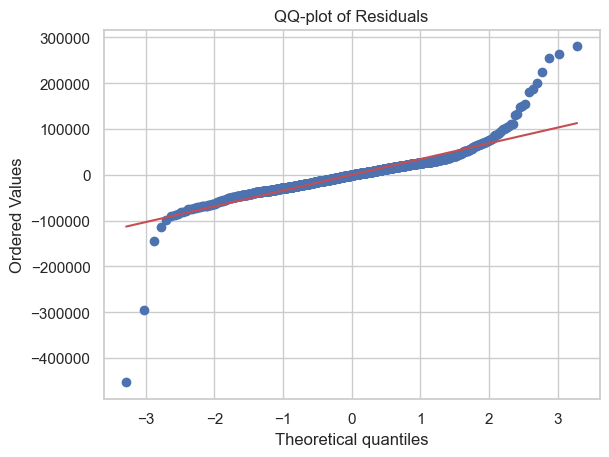

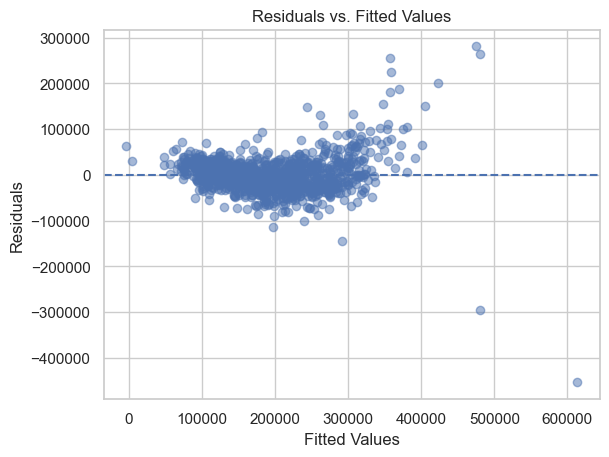

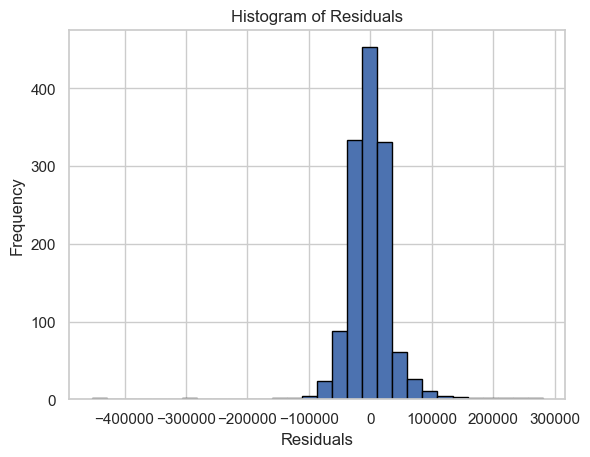

5-fold CV RMSE: 39369.86 ± 4362.30


In [33]:
# Residual diagnostics
fitted2 = model2.fittedvalues
resid2 = model2.resid

# QQ-plot of residuals
plt.figure()
st.probplot(resid2, dist="norm", plot=plt)
plt.title("QQ-plot of Residuals")
plt.show()

# Residuals vs. fitted values
plt.figure()
plt.scatter(fitted2, resid2, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Histogram of residuals
plt.figure()
plt.hist(resid2, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 5-fold cross-validation to estimate RMSE
X = train_clean[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'B', 'D', 'E']]
y = train_clean['SalePrice'].values
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rmses = []

for train_idx, test_idx in kf.split(X):
    lr = LinearRegression().fit(X.iloc[train_idx], y[train_idx])
    y_pred = lr.predict(X.iloc[test_idx])
    rmses.append(np.sqrt(mean_squared_error(y[test_idx], y_pred)))

print(f"5-fold CV RMSE: {np.mean(rmses):.2f} ± {np.std(rmses):.2f}")

## Time series

We will examine whether the variable SalePrice follows a general trend using time series analysis. To do this, we will take into account the variables YrSold and MoSold, which represent the years and months in which the houses were sold at a certain price listed in SalePrice.

First, the initial step is to extract these variables and compute the monthly average of sale prices of homes (SalePrice) to properly analyze the data.

Date
2006-01-01    201090.000000
2006-02-01    194322.222222
2006-03-01    184982.200000
2006-04-01    174312.814815
2006-05-01    158928.289474
Freq: MS, Name: SalePrice, dtype: float64


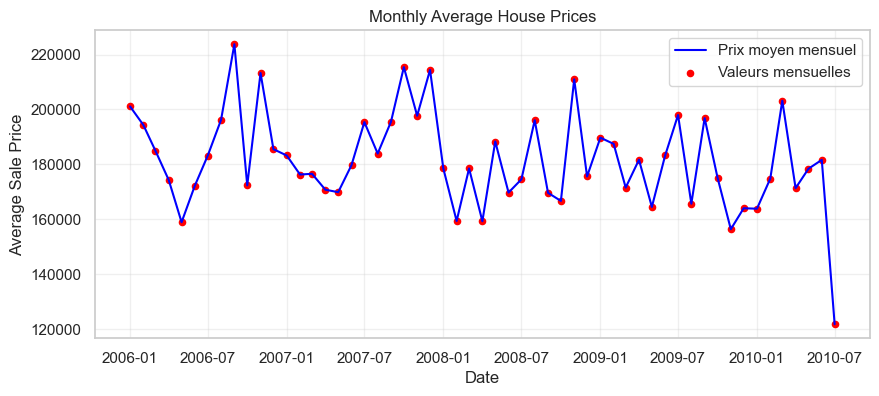

In [26]:
train_df = pd.read_csv("train.csv")

# Avarage to analyse time series

train_df['Date'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str) + '-01')
monthly_prices = train_df.groupby('Date')['SalePrice'].mean().sort_index()
monthly_prices.index.freq = 'MS'
print(monthly_prices.head())

# Plot 

plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Prix moyen mensuel', linestyle='-', color='blue')
plt.scatter(monthly_prices.index, monthly_prices.values, color='red', s=20, label='Valeurs mensuelles')
plt.title('Monthly Average House Prices')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Graph Analysis : 

Here is the graph showing the evolution of monthly averages between 2006 and mid-2010, represented by red dots. We can observe that the series appears to be non-stationary, although there is no clear overall upward or downward trend. However, there are some interesting patterns to note, such as the price increases that occur during the summer each year. This could be due to seasonality or a similar effect. It's also important to look at the case of the year 2010, where we see a sharp drop between June and July, which might be worth investigating, as it could indicate the presence of an outlier.

_______________

We now want to perform a decomposition in order to visualize the trend, seasonal, and residual components separately. To do this, we examine the graph above and observe that seasonality does not appear to increase significantly with price. Therefore, we will proceed with an additive decomposition.

<Figure size 1200x800 with 0 Axes>

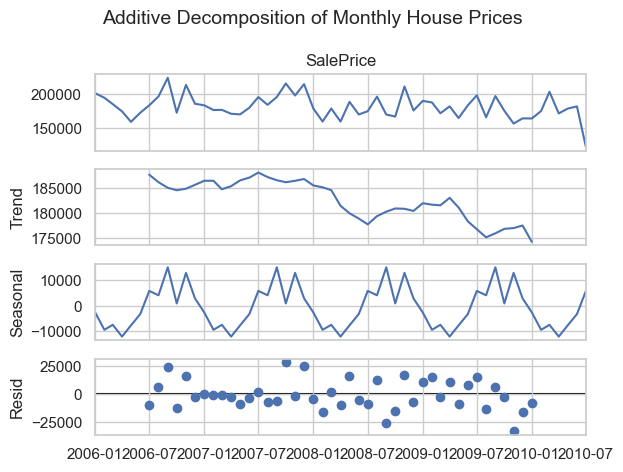

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive decomposition
additive_decomp = seasonal_decompose(monthly_prices, model='additive', period=12)

# Plot the components
plt.figure(figsize=(12, 8))
additive_decomp.plot()
plt.suptitle('Additive Decomposition of Monthly House Prices', fontsize=14)
plt.tight_layout()
plt.show()


We can observe a recurring seasonality in the third graph. This will need to be taken into account later during our ARIMA or SARIMA analyses. We also notice that the residuals fluctuate around zero, but many of them appear to be scattered and quite random. This is also something that should not be overlooked.

To better visualize the graph, we will smooth it using a Moving Average and a Simple Exponential Smoothing.

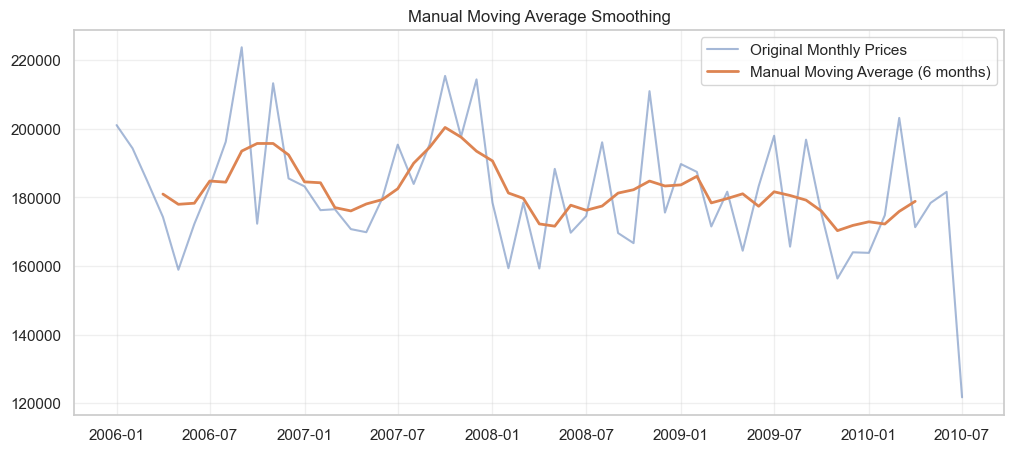

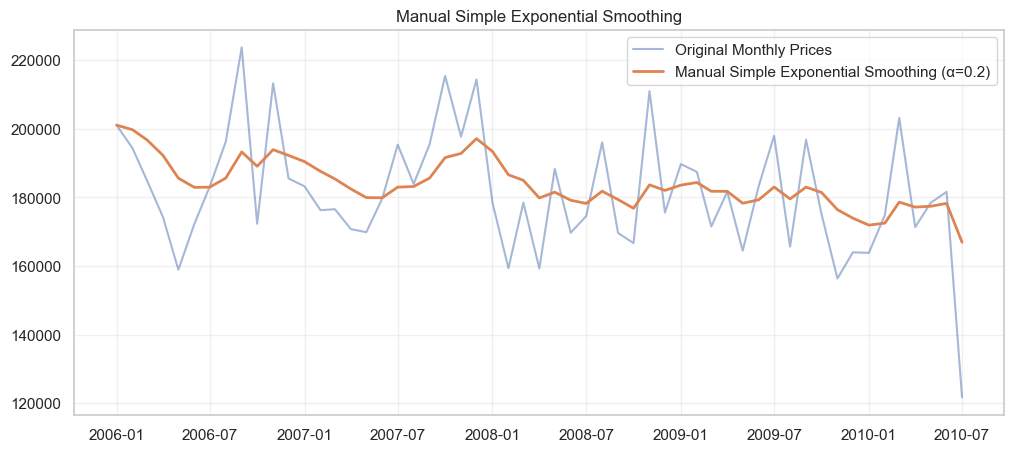

In [49]:
# Moving Average

window = 6
half_window = window // 2

manual_ma = []
for i in range(len(monthly_prices)):
    if i >= half_window and i <= len(monthly_prices) - half_window - 1:
        window_vals = monthly_prices.iloc[i - half_window : i + half_window]
        avg = window_vals.mean()
        manual_ma.append(avg)
    else:
        manual_ma.append(np.nan)

manual_ma = pd.Series(manual_ma, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Original Monthly Prices')
plt.plot(manual_ma, label=f'Manual Moving Average ({window} months)', linewidth=2)
plt.title('Manual Moving Average Smoothing')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# SES

alpha = 0.2
ses_manual = [monthly_prices.iloc[0]]

for t in range(1, len(monthly_prices)):
    ses_t = alpha * monthly_prices.iloc[t] + (1 - alpha) * ses_manual[-1]
    ses_manual.append(ses_t)

ses_manual = pd.Series(ses_manual, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Original Monthly Prices')
plt.plot(ses_manual, label=f'Manual Simple Exponential Smoothing (α={alpha})', linewidth=2)
plt.title('Manual Simple Exponential Smoothing')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

We can see that, despite the two smoothing methods applied, there is no clear special trend in either graph, except for a slight decrease of about 20,000 between early 2006 and early 2010 when looking at the SES graph.

___________________

Now, it is quite clear that our series is stationary, but to be certain and to be able to apply SARIMA, we will make it stationary by differencing and perform a stationarity test using the ADF test.

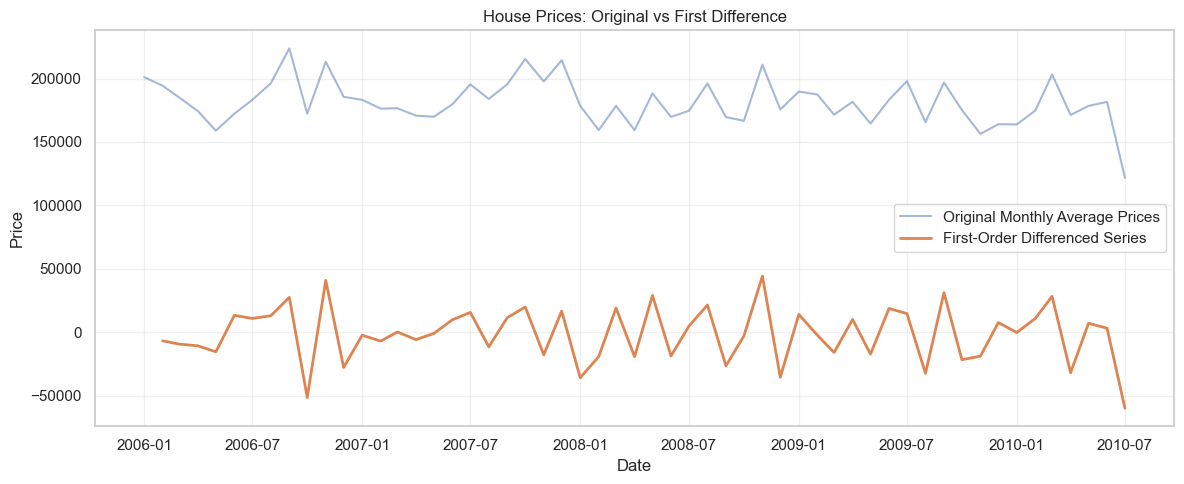

Augmented Dickey-Fuller Test on Differenced Series:
ADF Statistic: -3.864035699020967
p-value: 0.0023160587017149086
Critical Value (1%): -3.596635636000432
Critical Value (5%): -2.933297331821618
Critical Value (10%): -2.6049909750566895
The differenced series is likely stationary (p < 0.05).


In [29]:
from statsmodels.tsa.stattools import adfuller

# First-order differencing to remove trend
monthly_diff = monthly_prices.diff().dropna()

# Plot original and differenced series
plt.figure(figsize=(12, 5))
plt.plot(monthly_prices, label='Original Monthly Average Prices', alpha=0.5)
plt.plot(monthly_diff, label='First-Order Differenced Series', linewidth=2)
plt.title('House Prices: Original vs First Difference')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_diff)

# Display ADF test results
print("Augmented Dickey-Fuller Test on Differenced Series:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

if adf_result[1] < 0.05:
    print("The differenced series is likely stationary (p < 0.05).")
else:
    print("The differenced series is likely non-stationary (p >= 0.05).")

We notice that there is not much difference between the original series and the differenced series, but thanks to this and the results of the ADF tests, we have both graphical and statistical evidence (p-value well below 0.05) that the series is indeed stationary.

We can now generate the ACF and PACF plots to estimate the parameters to use for the ARIMA and SARIMA model.

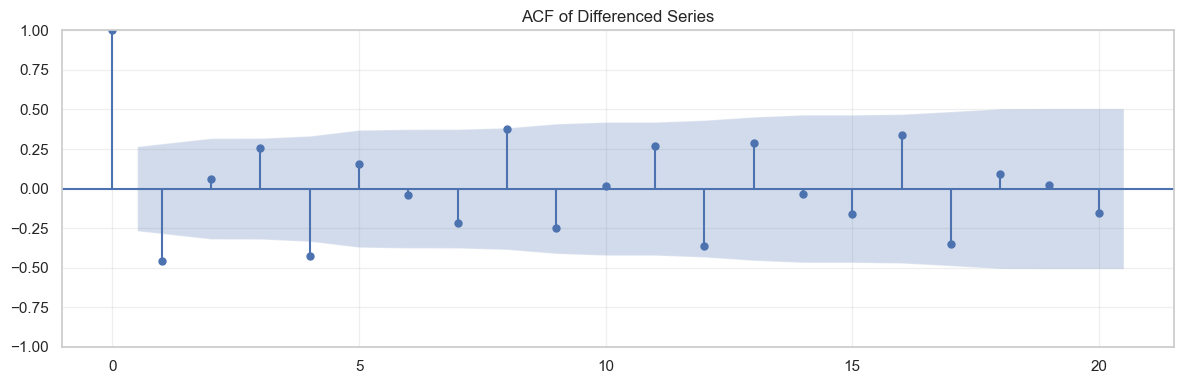

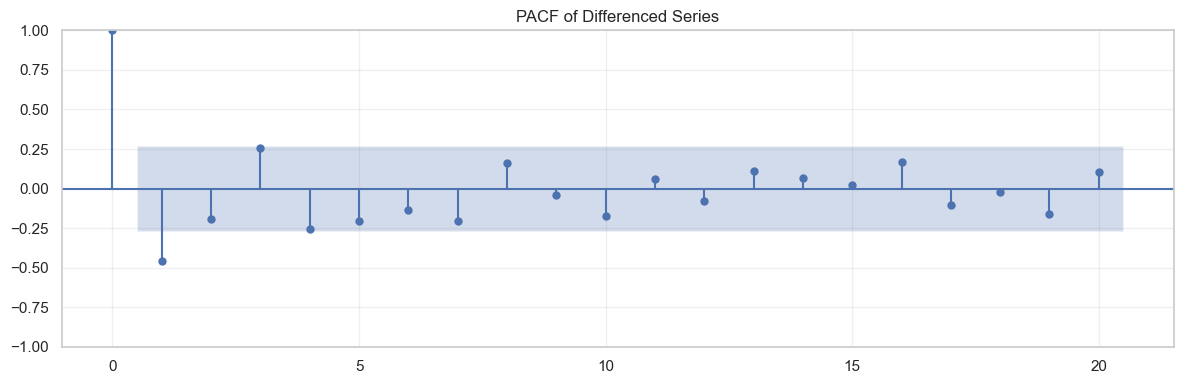

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_diff, lags=20, ax=plt.gca(), title="ACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_diff, lags=20, ax=plt.gca(), method='ywmle', title="PACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

For the ACF, we observe a first significant lag at 1, followed by a drop into negative values, then oscillations around 0 with an amplitude of approximately ±0.45. This pattern could be typical of an MA(1) model. The persistent oscillations might result from a weak MA component or lingering white noise.
As for the PACF, the pattern is similar, except that the oscillation range is about ±0.25, which is slightly smaller than that of the ACF. This is also characteristic of an AR(1) model.

_______________


We will now test an initial ARIMA model with the components (p, d, q), using p = 1 based on the AR(1) pattern, d = 1 since we differenced the series once, and q = 1 based on the MA(1) pattern. Here is the result:

                               SARIMAX Results                                
Dep. Variable:              SalePrice   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -613.320
Date:                Mon, 26 May 2025   AIC                           1232.640
Time:                        10:52:07   BIC                           1238.606
Sample:                    01-01-2006   HQIC                          1234.941
                         - 07-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2958      0.250      1.185      0.236      -0.194       0.785
ma.L1         -0.5762      0.271     -2.129      0.033      -1.107      -0.046
sigma2      3.742e+08   4.54e-10   8.25e+17      0.0

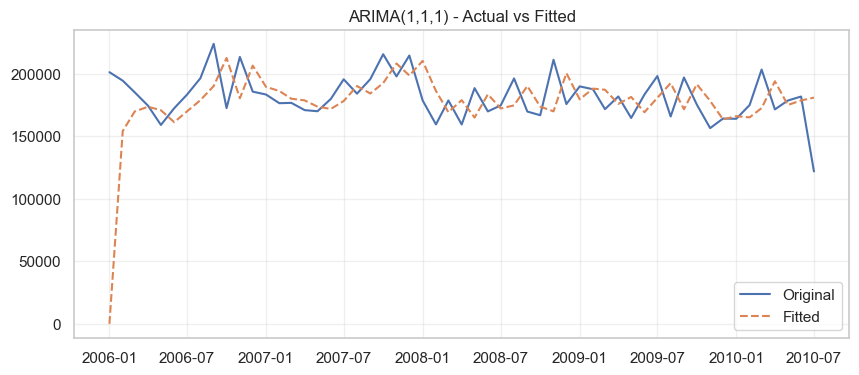

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(monthly_prices, order=(1,1,1))
result = model.fit()

# Print model summary
print(result.summary())

# Plot the fitted vs actual
plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Original')
plt.plot(result.fittedvalues, label='Fitted', linestyle='--')
plt.title("ARIMA(1,1,1) - Actual vs Fitted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Results Analysis

First, from a graphical perspective, we observe that the model does not approximate the original series particularly well. There are noticeable shifts, a significant difference at the beginning of 2006, and a different seasonal pattern. 

Next, we examine the quality of the parameters ar.L1 and ma.L1. We find that ar.L1 = 0.296 and ma.L1 = -0.576. Looking at the p-values of both parameters, we see that ar.L1 is not statistically significant for our model, as its p-value is 0.236. Therefore, it contributes little to the model. On the other hand, the ma.L1 coefficient has a p-value of 0.033, which is below 0.05, making it statistically significant. 

Then, if we look at the AIC and BIC values, we find AIC = 1232.64 and BIC = 1238.60. These values are useful for comparing different models, and the goal is to have the lowest possible values. 

Furthermore, when examining the various diagnostic tests, we see that the Ljung-Box test yields a result of 4.74 with a p-value of 0.03. This value is below 0.05, indicating the presence of autocorrelation in the residuals, and suggesting that the ARIMA(1,1,1) model does not fully capture the temporal structure.
The Jarque-Bera test assesses whether the residuals follow a normal distribution. In this case, the test result is 0.56 with a p-value of 0.76, so we fail to reject the null hypothesis and conclude that the residuals are normally distributed. We can therefore conclude that the current model is not yet satisfactory. 

______________

As we observed earlier, there is a noticeable seasonality in the data. Therefore, we will test several SARIMA models to identify the most conclusive ones — that is, those for which the diagnostic tests are valid and which have the lowest AIC and BIC values.

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# differents orders
seasonal_orders = [
    (1, 1, 0, 12),
    (0, 1, 0, 12),
    (0, 1, 1, 12),
    (1, 1, 1, 12),
    (2, 1, 0, 12),
    (0, 1, 2, 12),
    (2, 1, 2, 12),
    (1, 1, 2, 12),
    (2, 1, 1, 12),
]

# start with (1,1,1)
for s_order in seasonal_orders:
    try:
        model = SARIMAX(
            monthly_prices,
            order=(1, 1, 1),
            seasonal_order=s_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        ).fit(disp=False)

        aic = model.aic
        bic = model.bic
        pvals = model.pvalues

        all_significant = all(p < 0.05 for p in pvals)

        print(f"Seasonal order: {s_order} → AIC: {aic:.2f}, BIC: {bic:.2f}")
        print(f"All coefficients significant? {all_significant}")
        print('-' * 60)

    except Exception as e:
        print(f"Seasonal order {s_order} failed: {e}")


Seasonal order: (1, 1, 0, 12) → AIC: 677.71, BIC: 683.18
All coefficients significant? False
------------------------------------------------------------
Seasonal order: (0, 1, 0, 12) → AIC: 938.57, BIC: 943.64
All coefficients significant? False
------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse


Seasonal order: (0, 1, 1, 12) → AIC: 1098.62, BIC: 1103.95
All coefficients significant? False
------------------------------------------------------------
Seasonal order: (1, 1, 1, 12) → AIC: 1239.96, BIC: 1246.62
All coefficients significant? False
------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Seasonal order: (2, 1, 0, 12) → AIC: 401.59, BIC: 405.76
All coefficients significant? False
------------------------------------------------------------
Seasonal order: (0, 1, 2, 12) → AIC: 378.95, BIC: 382.81
All coefficients significant? False
------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Seasonal order: (2, 1, 2, 12) → AIC: 380.38, BIC: 385.79
All coefficients significant? False
------------------------------------------------------------
Seasonal order: (1, 1, 2, 12) → AIC: 378.46, BIC: 383.09
All coefficients significant? False
------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Seasonal order: (2, 1, 1, 12) → AIC: 1531.13, BIC: 1536.13
All coefficients significant? False
------------------------------------------------------------


Several SARIMA models were tested (see the notebook), and we observed a wide range of AIC values. Notably, some warnings were raised, indicating that SARIMA failed to find a stable solution in certain cases, which means the corresponding AIC values may be unreliable. For these cases, we decided not to consider the results and to focus only on models without specific warnings.

Looking at the best-performing models, we conclude that the SARIMA model (1,1,1) × (1,1,2,12) is the most promising, with an AIC of 378.46 and no warnings. It is closely followed by the model (1,1,1) × (0,1,2,12) with an AIC of 378.95. Both results are very good, and we will keep these models for further graphical analysis.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                               SalePrice   No. Observations:                   55
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -183.229
Date:                                 Mon, 26 May 2025   AIC                            378.458
Time:                                         15:31:10   BIC                            383.093
Sample:                                     01-01-2006   HQIC                           378.695
                                          - 07-01-2010                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9612      1.615     -0.595      0.552      -4.126       2

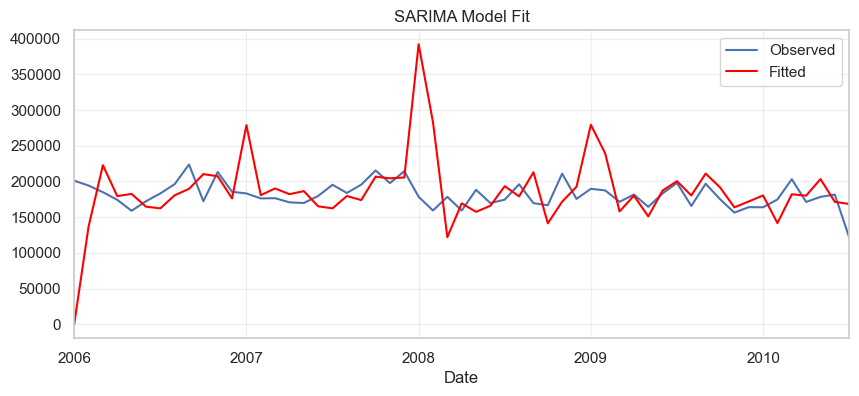

In [54]:
# Fit SARIMA(1,1,1)(1,1,2,12)
model = SARIMAX(monthly_prices,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 2, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Model summary
print(results.summary())

# Plot 
monthly_prices.plot(label='Observed', figsize=(10, 4))
results.fittedvalues.plot(label='Fitted', color='red')
plt.title('SARIMA Model Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                               SalePrice   No. Observations:                   55
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -184.473
Date:                                 Mon, 26 May 2025   AIC                            378.945
Time:                                         15:13:06   BIC                            382.808
Sample:                                     01-01-2006   HQIC                           379.143
                                          - 07-01-2010                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1037      2.593     -0.040      0.968      -5.186       4

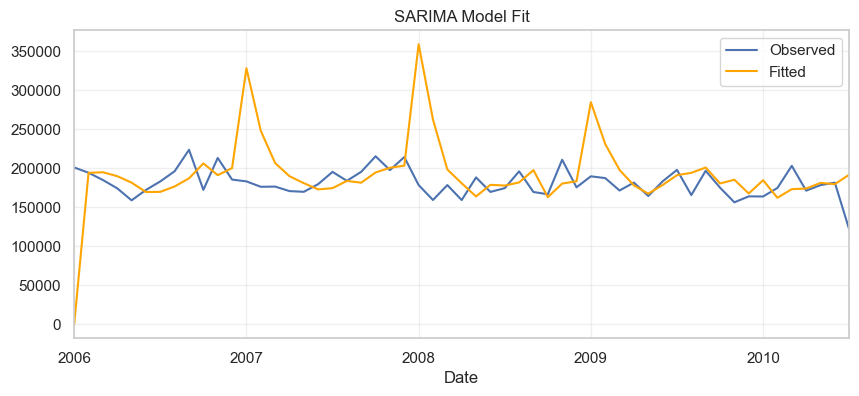

In [50]:
# Fit SARIMA(1,1,1)(0,1,2,12)
model2 = SARIMAX(monthly_prices,
                 order=(1, 1, 1),
                 seasonal_order=(0, 1, 2, 12),
                 enforce_stationarity=False,
                 enforce_invertibility=False)

results2 = model2.fit(disp=False)
print(results2.summary())

# Plot
monthly_prices.plot(label='Observed', figsize=(10, 4))
results2.fittedvalues.plot(label='Fitted', color='orange')
plt.title('SARIMA Model Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Results Analysis

We will now analyze the results obtained for these two models, focusing in particular on the Ljung-Box and Jarque-Bera tests. Let’s begin with the best-performing model, (1,1,1) × (1,1,2,12). The Ljung-Box test yields a statistic of 0.00 with a p-value of 0.99, indicating that there is no autocorrelation in the residuals, as the p-value is well above 0.05.
For the Jarque-Bera test, we obtain a value of 0.07 with a p-value of 0.96, also above 0.05, which suggests that the residuals are normally distributed. We can therefore conclude that this model is well-fitted.

As for the second model, (1,1,1) × (0,1,2,12), the Ljung-Box test result is 0.01 with a p-value of 0.92. The conclusion is similar to that of the first model, although the values are slightly less optimal.
However, the Jarque-Bera test gives a value of 8.19 with a p-value of 0.02, which is below 0.05, indicating that the residuals are not normally distributed, a factor that may lead to biased or unreliable results.


We will therefore proceed with the first model and plot the residuals along with their ACF and PACF to provide visual confirmation.


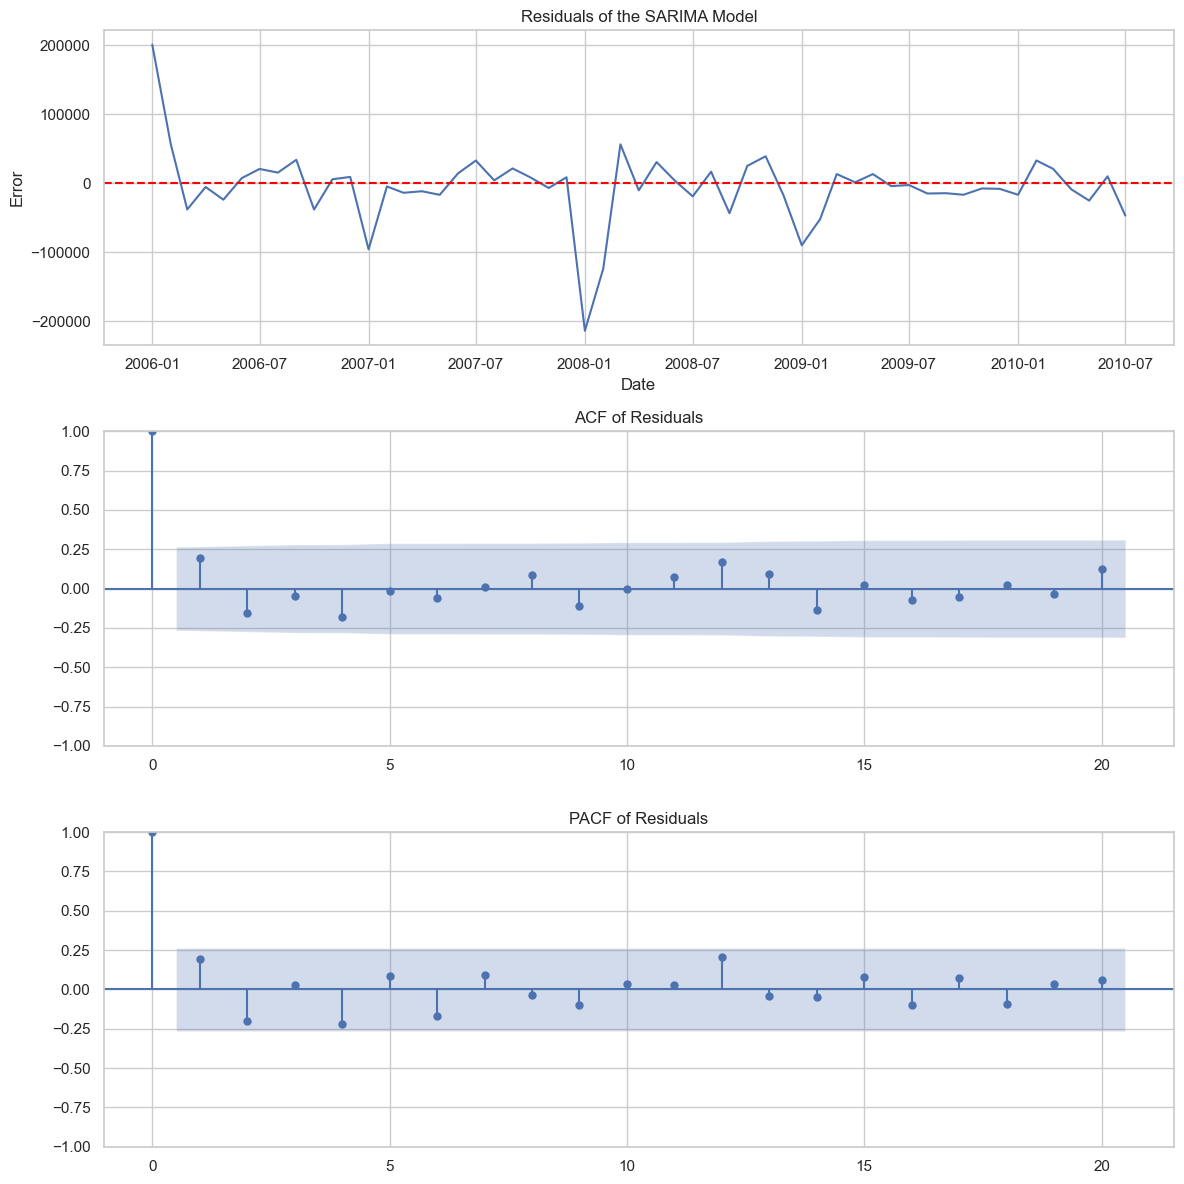

Durbin-Watson Statistic: 1.303
Possible autocorrelation detected in residuals.


In [52]:
from statsmodels.stats.stattools import durbin_watson

# Residuals from the fitted SARIMA model
residuals = results.resid

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 1. Plot the residuals to check if they are centered around zero with no obvious patterns
axes[0].plot(residuals)
axes[0].axhline(0, linestyle='--', color='red')
axes[0].set_title("Residuals of the SARIMA Model")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Error")

# 2. Plot the Autocorrelation Function (ACF) of the residuals
# This helps to identify any remaining autocorrelation in the residuals
plot_acf(residuals, lags=20, ax=axes[1])
axes[1].set_title("ACF of Residuals")

# 3. Plot the Partial Autocorrelation Function (PACF) of the residuals
# This helps to identify the direct relationships between residuals at different lags
plot_pacf(residuals, lags=20, method="ywm", ax=axes[2])
axes[2].set_title("PACF of Residuals")

# Adjust layout to prevent overlap between plots and labels
plt.tight_layout()
plt.show()

# 4. Calculate and print the Durbin-Watson statistic to test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.3f}")

# Quick interpretation of Durbin-Watson statistic:
# - Values close to 2 suggest no autocorrelation
# - Values < 1.5 or > 2.5 suggest possible autocorrelation
if 1.5 < dw_stat < 2.5:
    print("Residuals do not appear to be autocorrelated (Durbin-Watson OK).")
else:
    print("Possible autocorrelation detected in residuals.")


We observe that, apart from some unexpected spikes, the residuals appear centered around zero. For the residuals’ ACF and PACF, all lags fall within the confidence bands, indicating no significant autocorrelation in our model. 
However, the Durbin-Watson test yields a somewhat surprising value of 1.303, which could suggest slight positive autocorrelation, contrary to the indications from the Ljung-Box test, ACF, and PACF. This discrepancy might be due to the Durbin-Watson test’s sensitivity to autocorrelation at lag 1, potentially skewing the result slightly. 
But since the ACF, PACF, and Ljung-Box tests do not show evidence of autocorrelation, the Durbin-Watson value alone is not sufficient to reject our model.

We will now proceed to the final step of this time series section: forecasting for the next 12 months. We will base our predictions on the SARIMA model selected above and forecast both the expected values and the volatility of the housing market.

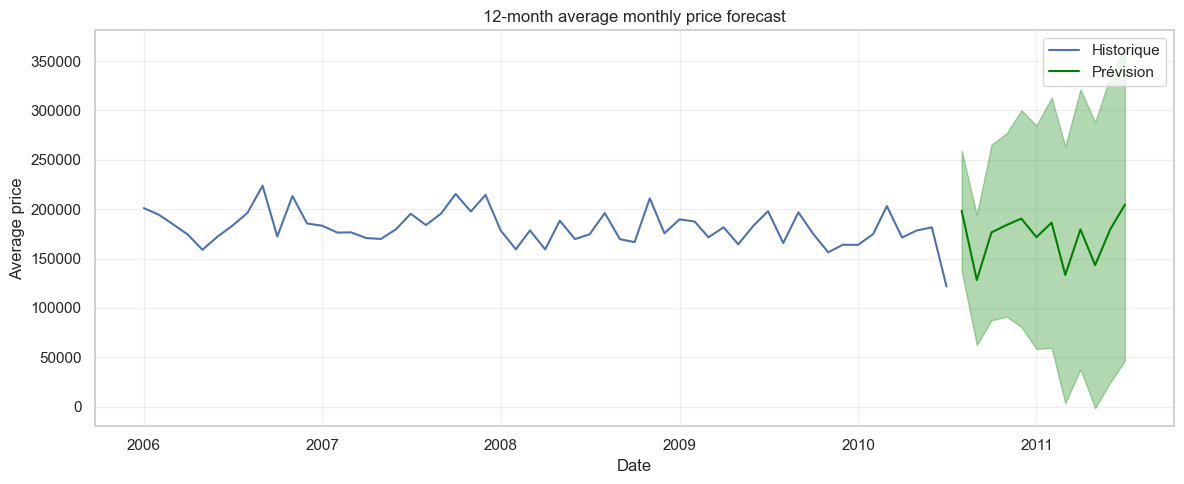

In [47]:
# Prediction for the next 12 months
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_prices, label='Historique')
plt.plot(forecast_mean, label='Prévision', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='green', alpha=0.3)
plt.title("12-month average monthly price forecast")
plt.xlabel("Date")
plt.ylabel("Average price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Here is the graph predicting prices for the end of 2010 and the first half of 2011. We observe that the predicted curve continues the previous trend without any major changes. The green bands represent the confidence intervals, which are quite wide to provide a large prediction range.
We notice that the sharp drop in summer 2010 is immediately followed by a steep increase, then another rise towards the end of spring 2011, reflecting the seasonality we observed during the series analysis.
This prediction seems quite reasonable compared to the previous years’ trend and does not change drastically.